In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('test_df_correlations.csv')

In [3]:
display(df)

,x1,x2,x3,x4,y
0,1.093225,1.309176,1.897384,2.486451,22.235206
1,0.157014,1.904288,3.806877,0.614027,10.353393
2,1.435626,3.195309,0.754102,3.171253,18.539806
3,0.863223,4.285680,2.768888,2.026447,16.726124
4,1.516882,0.326480,1.731697,3.333764,18.630835
...,...,...,...,...,...
95,2.535383,0.622430,2.090665,5.370765,86.364681
96,3.980523,4.666955,1.998694,8.261047,331.377799
97,2.012214,2.012195,2.790083,4.324427,42.567848
98,0.874867,2.785506,0.679396,2.049735,17.649409


In [4]:
X = df[['x1', 'x2', 'x3', 'x4']]
display(X)

,x1,x2,x3,x4
0,1.093225,1.309176,1.897384,2.486451
1,0.157014,1.904288,3.806877,0.614027
2,1.435626,3.195309,0.754102,3.171253
3,0.863223,4.285680,2.768888,2.026447
4,1.516882,0.326480,1.731697,3.333764
...,...,...,...,...
95,2.535383,0.622430,2.090665,5.370765
96,3.980523,4.666955,1.998694,8.261047
97,2.012214,2.012195,2.790083,4.324427
98,0.874867,2.785506,0.679396,2.049735


In [5]:
y = df['y']
display(y)

0      22.235206
1      10.353393
2      18.539806
3      16.726124
4      18.630835
         ...    
95     86.364681
96    331.377799
97     42.567848
98     17.649409
99    183.953917
Name: y, Length: 100, dtype: float64

y = f(x), what is f?

In [6]:
df.corr(method='pearson')

,x1,x2,x3,x4,y
x1,1.000000,0.177777,0.057846,1.000000,0.904964
x2,0.177777,1.000000,0.086735,0.177777,0.210846
x3,0.057846,0.086735,1.000000,0.057846,0.057919
x4,1.000000,0.177777,0.057846,1.000000,0.904964
y,0.904964,0.210846,0.057919,0.904964,1.000000


y = f(x1,x2,x3), importance x1 > x2 > x3
pearson = Cov(x,y)/sqrt(std(y)std(x)), good for linear correlations
y = x^10 vs y = x

In [7]:
df.corr(method='spearman')

,x1,x2,x3,x4,y
x1,1.000000,0.150471,0.046553,1.000000,0.979082
x2,0.150471,1.000000,0.080336,0.150471,0.209133
x3,0.046553,0.080336,1.000000,0.046553,0.058722
x4,1.000000,0.150471,0.046553,1.000000,0.979082
y,0.979082,0.209133,0.058722,0.979082,1.000000


pearson -> linear, spearman -> nonlinear

In [8]:
from scipy.stats import pearsonr, spearmanr

In [9]:
print(spearmanr(X.values, y.values.reshape((-1,1))).pvalue)

[[0.00000000e+00 1.35093432e-01 6.45571338e-01 0.00000000e+00
  1.40125961e-69]
 [1.35093432e-01 0.00000000e+00 4.26877943e-01 1.35093432e-01
  3.67810431e-02]
 [6.45571338e-01 4.26877943e-01 0.00000000e+00 6.45571338e-01
  5.61687340e-01]
 [0.00000000e+00 1.35093432e-01 6.45571338e-01 0.00000000e+00
  1.40125961e-69]
 [1.40125961e-69 3.67810431e-02 5.61687340e-01 1.40125961e-69
  0.00000000e+00]]


y = p(x1) + a*x2 + b*x3 + c

In [10]:
import matplotlib.pyplot as plt

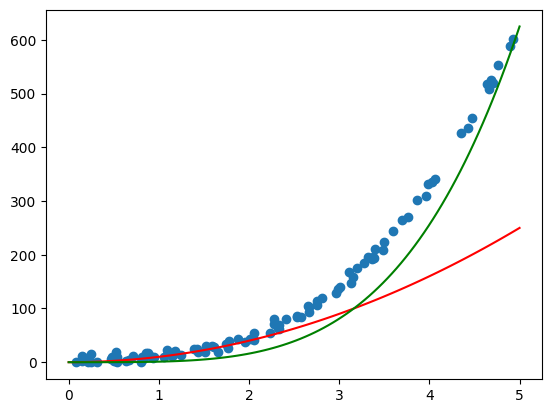

In [11]:
plt.figure()
plt.scatter(X['x1'], y)
plt.plot(np.linspace(0,5,100), 10*np.linspace(0,5,100)**2, color='r')
plt.plot(np.linspace(0,5,100), np.linspace(0,5,100)**4, color='g')

In [12]:
import statsmodels.api as sm

# building the model and fitting the data
x = X['x1'].values.reshape((-1,1))
for ii in range(2,5):
    x = np.hstack([x, X['x1'].values.reshape((-1,1))**ii])
display(X['x1'])
print(x)
print(x.shape)

0     1.093225
1     0.157014
2     1.435626
3     0.863223
4     1.516882
        ...   
95    2.535383
96    3.980523
97    2.012214
98    0.874867
99    3.275077
Name: x1, Length: 100, dtype: float64

[[1.09322525e+00 1.19514145e+00 1.30655881e+00 1.42836308e+00]
 [1.57013598e-01 2.46532698e-02 3.87089858e-03 6.07783712e-04]
 [1.43562639e+00 2.06102312e+00 2.95885918e+00 4.24781631e+00]
 [8.63223278e-01 7.45154427e-01 6.43234647e-01 5.55255121e-01]
 [1.51688190e+00 2.30093071e+00 3.49024016e+00 5.29428214e+00]
 [8.14751113e-01 6.63819375e-01 5.40847575e-01 4.40656163e-01]
 [3.49656877e+00 1.22259931e+01 4.27490257e+01 1.49474908e+02]
 [3.85755416e+00 1.48807241e+01 5.74031991e+01 2.21435949e+02]
 [2.57276224e+00 6.61910553e+00 1.70293848e+01 4.38125581e+01]
 [1.17903444e+00 1.39012221e+00 1.63900196e+00 1.93243976e+00]
 [1.15019813e+00 1.32295575e+00 1.52166123e+00 1.75021190e+00]
 [2.52857583e+00 6.39369574e+00 1.61669445e+01 4.08793452e+01]
 [6.70924815e-01 4.50140107e-01 3.02010168e-01 2.02626116e-01]
 [2.80731131e+00 7.88099682e+00 2.21244115e+01 6.21101109e+01]
 [2.41000102e+00 5.80810489e+00 1.39975387e+01 3.37340825e+01]
 [3.39834378e+00 1.15487404e+01 3.92465902e+01 1.333734

In [13]:
reg = sm.OLS(y, sm.add_constant(x)).fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          1.74e-136
Time:                        00:40:12   Log-Likelihood:                -317.59
No. Observations:                 100   AIC:                             645.2
Df Residuals:                      95   BIC:                             658.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5886      3.091      0.837      0.4

$$y = ax_1^3 + bx_2 + cx_3 + d$$

In [14]:
V = np.hstack([X['x1'].values.reshape((-1,1))**3, X['x2'].values.reshape((-1,1)), X['x3'].values.reshape((-1,1))])
# print(V)
V = pd.DataFrame(V, columns=['x1^3', 'x2', 'x3'])
display(V)

,x1^3,x2,x3
0,1.306559,1.309176,1.897384
1,0.003871,1.904288,3.806877
2,2.958859,3.195309,0.754102
3,0.643235,4.285680,2.768888
4,3.490240,0.326480,1.731697
...,...,...,...
95,16.297857,0.622430,2.090665
96,63.069668,4.666955,1.998694
97,8.147459,2.012195,2.790083
98,0.669617,2.785506,0.679396


In [15]:
reg = sm.OLS(y, sm.add_constant(V)).fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.874e+04
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          1.30e-141
Time:                        00:40:20   Log-Likelihood:                -310.66
No. Observations:                 100   AIC:                             629.3
Df Residuals:                      96   BIC:                             639.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5373      1.348      1.141      0.2

In [16]:
W = V[['x1^3', 'x2']]

In [17]:
reg = sm.OLS(y, sm.add_constant(W)).fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.261e+04
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          1.59e-143
Time:                        00:40:26   Log-Likelihood:                -311.75
No. Observations:                 100   AIC:                             629.5
Df Residuals:                      97   BIC:                             637.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7394      1.072      2.555      0.0

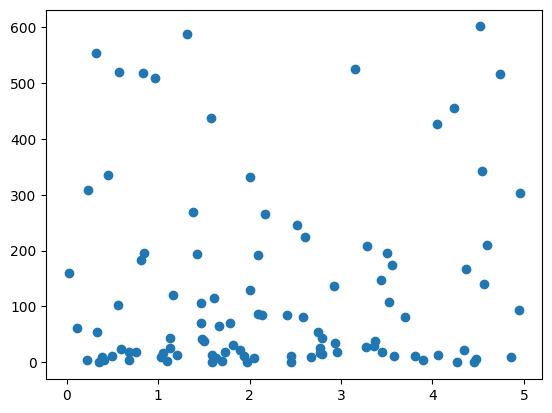

In [18]:
plt.figure()
plt.scatter(X['x3'], y)

=================== BELOW NOT TO BE RUN ===================

In [ ]:
import numpy as np
np.random.seed(65)

bias = 1.0
coef = np.array([5.0,2.0,0.2]).reshape(-1,1)
sigma_noise = 5.

x1 = np.random.uniform(low=0,high=5,size=(100,1))
x2 = np.random.uniform(low=0,high=5,size=(100,1))
x3 = np.random.uniform(low=0,high=5,size=(100,1))

x = np.concatenate([x1**3,x2,x3],axis=1)
noise = np.random.normal(0,sigma_noise,size=(len(x),1))
# y = A + B*x1 + C*x1**2 + D*x**3 + 
y = x@coef + bias + noise

# Remove quadratic term (needs to be found!!!)
x = x[:,1:]
# Add a correlat

x = np.concatenate([x1,x,2.*x1+0.3],axis=1)

# plt.scatter(x[:,0],y.ravel()) # Linear X1
# plt.scatter(x[:,1],y.ravel()) # Linear X2
# plt.scatter(x[:,2],y.ravel()) # Correlated X1 linear
# print(y)
# print(x)

df = pd.DataFrame(columns=['x1','x2','x3','x4'], data=x)
df['y'] = y
df.to_csv('test_df_correlations.csv',index=False)

=================== BELOW NOT TO BE RUN ===================

In [ ]:
def linear_regression(x: np.ndarray, y: np.ndarray):
    # Add bias unit
    x = np.concatenate([np.ones_like(x),x],axis=1)
    # Solve normal equations
    beta = np.linalg.pinv(x.T@x)@x.T@y
    # Now estimate errors around parameters
    # See: https://stats.stackexchange.com/questions/44838/how-are-the-standard-errors-of-coefficients-calculated-in-a-regression
    sigma_2 = (((y - x@beta)**2)/(x.shape[0] - x.shape[1])).sum()  # Noise estimate
    var = np.linalg.pinv(x.T@x)*sigma_2  # Parameter's variance
    std_err = np.sqrt(np.diag(var))  # Standard error (deviation)
    
    # Return parameters and corresponding standard errors (bias,slope)
    return beta.ravel(), std_err.ravel()